# Projeto 2 - Ciência dos Dados
---

### Turma C

### Nomes
Gustavo Eizo Takahashi

João Pedro Lindenberg

Marcos Augusto Rossi Paulino Costa

---

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re


In [ ]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

---
# Pergunta Norteadora do Projeto: 

Acesso à internet para alunos nas escolas do estado de São Paulo


---
# Base de dados

Microdados do Censo Escolar da Educação Básica 2022

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/censo-escolar


In [ ]:
dados = pd.read_csv("microdados_ed_basica_2022.csv", encoding='cp1252', sep=';')


In [ ]:
dados.head()

In [ ]:
dados.shape

In [ ]:
dados.describe()

In [134]:
# USANDO SOMENTE O AMAZONAS
dados_filtrados = dados[dados['NO_UF'] == 'Amazonas']

# FILTRANDO SOMENTE AS ESCOLAS QUE ESTÃO EM FUNCIONAMENTO
dados_filtrados = dados_filtrados[dados_filtrados['TP_SITUACAO_FUNCIONAMENTO'] == 1]

# SELECIONANDO SOMENTE AS COLUNAS QUE QUEREMOS
colunas_selecionadas = ['IN_INTERNET_ALUNOS','NO_UF', 'IN_AREA_VERDE', 'IN_AGUA_FILTRADA', 'IN_BIBLIOTECA', 'TP_LOCALIZACAO']

df_projeto = dados_filtrados[colunas_selecionadas]

df_projeto

,IN_INTERNET_ALUNOS,NO_UF,IN_AREA_VERDE,IN_AGUA_FILTRADA,IN_BIBLIOTECA,TP_LOCALIZACAO
3077,0.0,Amazonas,1.0,NaN,0.0,1
3078,0.0,Amazonas,0.0,NaN,0.0,1
3079,0.0,Amazonas,1.0,NaN,0.0,2
3080,0.0,Amazonas,1.0,NaN,0.0,2
3081,0.0,Amazonas,0.0,NaN,0.0,2
...,...,...,...,...,...,...
9398,0.0,Amazonas,1.0,NaN,0.0,2
9400,0.0,Amazonas,1.0,NaN,1.0,2
9401,0.0,Amazonas,1.0,NaN,0.0,2
9402,0.0,Amazonas,1.0,NaN,0.0,1


In [136]:
cross_table = (pd.crosstab(df_projeto['IN_INTERNET_ALUNOS'], df_projeto['TP_LOCALIZACAO'])/len(df_projeto))*100

# 54% das localizações urbanas não possuem acesso a internet
# Somente 3.33% na area rural possuem acesso a internet
cross_table

TP_LOCALIZACAO,1,2
IN_INTERNET_ALUNOS,,
0.0,21.618159,62.493136
1.0,11.403990,3.862347


---
## Categoria Target definida:
Variável: IN_INTERNET_ALUNOS

Acesso à Internet para uso dos alunos



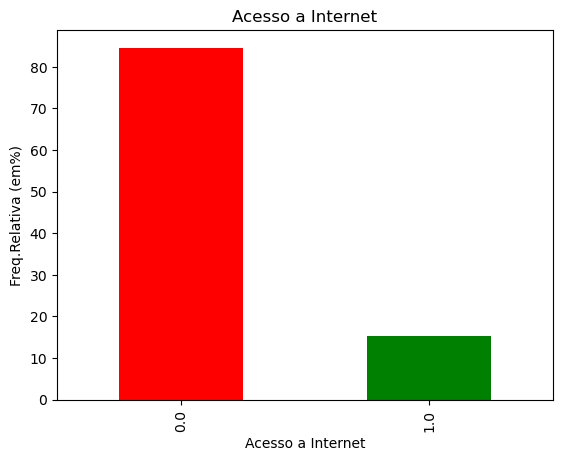

In [139]:
df_internet = df_projeto['IN_INTERNET_ALUNOS']

df_internet_valores = df_projeto['IN_INTERNET_ALUNOS'].value_counts(normalize=True)*100
df_internet_valores.plot(kind='bar', color=('red', 'green'))
plt.title('Acesso a Internet')
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Acesso a Internet')
plt.show()


## Pesquisa sobre fatores relacionados ao acesso à internet nas escolas





---
# Análise Exploratória dos Dados

## Escolha à priori de possíveis features baseando na pesquisa prévia



Legenda:
-    <span style="color: cyan">**Variável Qualitativa**</span>
-    <span style="color: orange">**Variável Quantitativa**</span>
---

-   <span style="color: cyan">**TP_DEPENDENCIA**</span> - Dependência Administrativa (pública, privada, etc.)

-   <span style="color: cyan">**TP_CATEGORIA_ESCOLA_PRIVADA**</span> - Categoria da escola privada

-   <span style="color: cyan">**TP_LOCALIZACAO**</span> - Localização (urbana, rural)

-   <span style="color: cyan">**TP_LOCALIZACAO_DIFERENCIADA**</span> - Localização diferenciada da escola

-   <span style="color: cyan">**TP_SITUACAO_FUNCIONAMENTO**</span> - Situação de funcionamento da escola

-   <span style="color: cyan">**IN_AGUA_FILTRADA**</span> - Indica se a escola possui água filtrada.

-   <span style="color: cyan">**IN_ENERGIA_INEXISTENTE**</span> - Informa se a escola não possui energia elétrica.

-   <span style="color: cyan">**IN_ESGOTO_INEXISTENTE**</span> - Indica se a escola não possui esgoto.

-   <span style="color: cyan">**IN_LIXO_RECICLA**</span> - Informa se a escola realiza reciclagem de lixo.

-   <span style="color: cyan">**IN_BIBLIOTECA**</span> - Indica a existência de biblioteca na escola.

-   <span style="color: cyan">**IN_SALA_PROFESSOR**</span> - Informa se a escola possui sala de professores.

-   <span style="color: cyan">**IN_LABORATORIO_CIENCIAS**</span> - Indica a existência de laboratório de ciências.

-   <span style="color: cyan">**IN_SALA_ATENDIMENTO_ESPECIAL**</span> - Informa sobre a existência de salas para atendimento especial.

-   <span style="color: cyan">**IN_QUADRA_ESPORTES**</span> - Indica a existência de quadra de esportes na escola.

-   <span style="color: cyan">**IN_COMPUTADOR**</span> - Informa se a escola possui computadores.

-   <span style="color: cyan">**IN_INTERNET**</span> - Indica se a escola possui acesso à internet.

-   <span style="color: cyan">**IN_BANDA_LARGA**</span> - Informa se a escola possui conexão banda larga.

-   <span style="color: cyan">**IN_ALIMENTACAO**</span> - Indica se a escola oferece alimentação para os alunos.

-   <span style="color: cyan">**IN_PATIO_COBERTO**</span> - Informa se a escola possui pátio coberto.

-   <span style="color: cyan">**IN_AREA_VERDE**</span> - Indica a existência de área verde na escola.

-   <span style="color: orange">**QT_FUNCIONARIOS**</span> - Total de funcionários da escola (inclusive profissionais escolares 
em sala de aula)


## Filtrando DataFrame